<a href="https://colab.research.google.com/github/rohitk140797k/Big-mart-Sales/blob/master/Lesson_1_Tweets_analysis_v0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective: 
Analyse tweets on a subject (economy) to identify -   
- the top hashtags associated with a target hashtag ('economy')

We'll need to perform a lot of clean up during the process. We will - 
- Normalize case
- Tokenize with specific rules
- Contextual stop word removal
- Cleanup - removal of URLs, User handles

Finally, we'll plot the top 10 hashtags that occurred along with '#economy' on a horizontal bar chart

In [0]:
import pandas as pd

In [2]:
inp_tweets0 = pd.read_csv("raw_tweets_economy.txt", sep="\t")
inp_tweets0.head()

,Unnamed: 0,0
0,0,Stocks losses deepen as a key recession warnin...
1,1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,2,AP Explains: Is the US economy nearing a reces...
3,3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,4,Who will stop mr. Mario Draghi and the ECB wit...


#### Drop the column '0', rename column '1' to 'tweet'

In [0]:
inp_tweets0.drop('Unnamed: 0', inplace=True, axis=1)

In [4]:
inp_tweets0.shape

(500, 1)

In [5]:
inp_tweets0.head()

,0
0,Stocks losses deepen as a key recession warnin...
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,AP Explains: Is the US economy nearing a reces...
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,Who will stop mr. Mario Draghi and the ECB wit...


Renaming the column

In [6]:
inp_tweets0 = inp_tweets0.rename({'0':'tweet'}, axis=1)
inp_tweets0.head()

,tweet
0,Stocks losses deepen as a key recession warnin...
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,AP Explains: Is the US economy nearing a reces...
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,Who will stop mr. Mario Draghi and the ECB wit...


In [7]:
inp_tweets0.tweet.sample().values

array(['RT @TheAssetMag: Singapore comes second in BRI opportunities in ASEAN- #BeltAndRoad #economy #infrastructure https://t.co/8k0h2oQ4BT'],
      dtype=object)

#### Get the tweets into a list, for easy text clean up and manipulation

In [0]:
tweets0 = inp_tweets0.tweet.values

In [9]:
len(tweets0)

500

In [10]:
tweets0[:5]

array(['Stocks losses deepen as a key recession warning surfaces @GOP #economy #fail #collapse #recession #gop #greed… https://t.co/F8kazAixUk',
       "RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews @realDonaldTrump \r\n#Trump is an ejit.\r\n#maga #TrumpTrain2020 #sheeple are idiot's.\r\n#farming #Trad…",
       'AP Explains: Is the US economy nearing a recession? \r\n#Business\r\n#Economy\r\n#Recession\r\n#TradeWar\r\n#China\r\n#EU… https://t.co/0jtsR2kSxi',
       'A @JobCreatorsUSA / https://t.co/JXEt7hQU4k survey completed Tuesday, 56% rated the #economy as good or excellent,… https://t.co/j1XMiptADx',
       'Who will stop mr. Mario Draghi and the ECB with this counterproductive course of money dumping / zero interests? It… https://t.co/eweIrVuOK0'],
      dtype=object)

The tweets contain - 
1. URLs
2. Hashtags
3. User handles
4. 'RT'

## Cleanup 

#### Normalizing case

In [0]:
tweets_lower = [twt.lower() for twt in tweets0]

In [12]:
tweets_lower[:5]

['stocks losses deepen as a key recession warning surfaces @gop #economy #fail #collapse #recession #gop #greed… https://t.co/f8kazaixuk',
 "rt @callmeahmjusayn: the #economy.\r\n@foxnews @realdonaldtrump \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…",
 'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… https://t.co/0jtsr2ksxi',
 'a @jobcreatorsusa / https://t.co/jxet7hqu4k survey completed tuesday, 56% rated the #economy as good or excellent,… https://t.co/j1xmiptadx',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… https://t.co/eweirvuok0']

#### Remove user handles, begin with '@'

In [0]:
import re

In [14]:
re.sub("@\w+","", "@Rahim this course rocks! http://rahimbaig.com/ai")

' this course rocks! http://rahimbaig.com/ai'

In [0]:
tweets_nouser = [re.sub("@\w+","", twt) for twt in tweets_lower]

In [16]:
tweets_nouser[:5]

['stocks losses deepen as a key recession warning surfaces  #economy #fail #collapse #recession #gop #greed… https://t.co/f8kazaixuk',
 "rt : the #economy.\r\n  \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…",
 'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… https://t.co/0jtsr2ksxi',
 'a  / https://t.co/jxet7hqu4k survey completed tuesday, 56% rated the #economy as good or excellent,… https://t.co/j1xmiptadx',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… https://t.co/eweirvuok0']

#### Remove URLs

In [17]:
re.sub("\w+://\S+","", "@Rahim this course rocks! http://rahimbaig.com/ai")

'@Rahim this course rocks! '

In [0]:
tweets_nourl = [re.sub("\w+://\S+","", twt) for twt in tweets_nouser]

In [19]:
tweets_nourl[:5]

['stocks losses deepen as a key recession warning surfaces  #economy #fail #collapse #recession #gop #greed… ',
 "rt : the #economy.\r\n  \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…",
 'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… ',
 'a  /  survey completed tuesday, 56% rated the #economy as good or excellent,… ',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… ']

In [20]:
tweets_nourl[-5:]

['rt : . has transformed (and expanded) the republican party, making it the party of blue collar working america…',
 'rt : #lebanon #beirut #politics #economy #commerce #funny #daily #media #crazy #science #food\r\n',
 'rt : . has transformed (and expanded) the republican party, making it the party of blue collar working america…',
 "rt : rt.'s #facts #thread\r\n1). blames u.s. sanctions for #iran’s crumbling #economy. #blacklistirgc #corrupti…",
 '#primeminister  commits to pumping 1.4$tr into the #economy of #india via #infrastructure projects .… ']

#### Extracting only the hashtags from the tweets - remember, we want to analyse the most common hashtags in the tweets

In [21]:
re.findall("#\w+","I love this #love #life and fun")

['#love', '#life']

In [22]:
re.findall("#\w+","@Rahim #food is #love")

['#food', '#love']

In [0]:
hashtags0 = [re.findall('#\w+',twt) for twt in tweets_nourl]

In [24]:
hashtags0[:5]

[['#economy', '#fail', '#collapse', '#recession', '#gop', '#greed'],
 ['#economy',
  '#trump',
  '#maga',
  '#trumptrain2020',
  '#sheeple',
  '#farming',
  '#trad'],
 ['#business', '#economy', '#recession', '#tradewar', '#china', '#eu'],
 ['#economy'],
 []]

### Finding out the most common hashtags and plotting them

#### First, combining all the individuals lists into a single list, which can easily be passed to a counter

In [0]:
#Declaring an empty list which will later contain all the hashtags
all_hashtags = []

In [0]:
for twt in hashtags0:
    all_hashtags.extend(twt)

In [27]:
all_hashtags[:5]

['#economy', '#fail', '#collapse', '#recession', '#gop']

In [28]:
len(all_hashtags)

1061

#### Removing '#economy' from the data, as this is what the tweets are about

In [0]:
stop_contextual = ['#economy']

#### Removing the contextual stopwords

In [0]:
all_hashtags = [tag for tag in all_hashtags if tag not in stop_contextual]

In [31]:
len(all_hashtags)

815

In [32]:
all_hashtags[:5]

['#fail', '#collapse', '#recession', '#gop', '#greed']

#### Using a counter to get the top hashtags

In [0]:
from collections import Counter

In [0]:
counts_hashtags = Counter(all_hashtags)

In [35]:
counts_hashtags.most_common(10)

[('#recession', 24),
 ('#india', 20),
 ('#business', 18),
 ('#hongkong', 17),
 ('#bloomberg', 15),
 ('#china', 12),
 ('#trump', 10),
 ('#markets', 9),
 ('#economics', 9),
 ('#infrastructure', 9)]

#### Plotting the top 10 hashtags

In [0]:
import matplotlib.pyplot as plt

In [0]:
res = counts_hashtags.most_common(10)

In [0]:
res2 = {term:cnt for term, cnt in res}

In [39]:
list(res2.keys())

['#recession',
 '#india',
 '#business',
 '#hongkong',
 '#bloomberg',
 '#china',
 '#trump',
 '#markets',
 '#economics',
 '#infrastructure']

In [40]:
list(res2.values())

[24, 20, 18, 17, 15, 12, 10, 9, 9, 9]

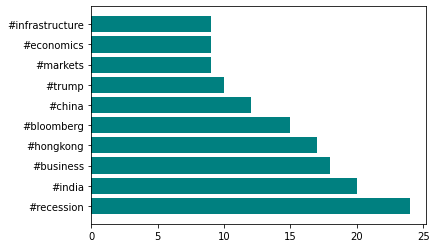

In [41]:
plt.barh(list(res2.keys()), list(res2.values()), color="teal")
plt.show()